# School of Electrical and Information Engineering
### University of the Witwatersrand, Johannesburg
### ELEN4022 — Full Stack Quantum Computing

# Outcome
This is an individual laboratory exercise. You are expected to familiarise yourself, learn and under-stand the use of the following:

1. A basic understanding of circuit simulation in Qiskit
2. A thorough understanding of the basic linear algebraic tools used in Quantum Computing
3. Programming idiomatic Python in a Jupyter environment
4. Reporting findings within your notebook using TeX and Markdown features
5. How to use git with notebooks

# Work Schedule
You are expected to have worked through the Getting Started with Qiskit notebook tutorial and have a basic grasp
of the mathematical representation of Quantum Computation (https://cnot.io/contents/ background and quantum computing
is a good start).

### Problem Description: Simulate the unitary of a CNOT Ring to validate an algebraically calculated result of the same structure.

The CNOT Ring pictured for a 5 qubit system below are a chain of CNOT gates that connect every qubit to its neighbouring
qubit where the last qubit neighbours the first (see https://pennylane.readthedocs.io/en/stable/code/api/pennylane.templates.layers.BasicEntanglerLayers.html). This circuit template finds application in a suite of quantum circuits known as variational quantum algorithms.

In [1]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

```python
N_W = 5
circ = QuantumCircuit(N_W)
circ = BasicEntangler(circ)
circ.draw(output='mpl',plot_barriers=True)
```

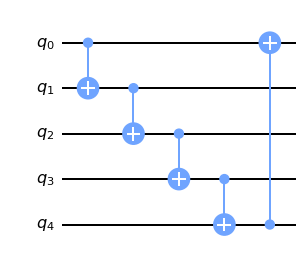

The final goal is to be able to provide a linear algebraic equation that exactly simulates the result of the unitary of an 
arbitary sized CNOT Ring and confirm this by using a Qiskit circuit model simulation.

Python natively supports complex number manipulation as well as unicode variables which could be used to make your code 
align more closely to the standard mathematical notation. Below shows some standard complex manipulation. Recall

$$r = |w| = u + jv =\sqrt{u^2+v^2}.$$
and $$z = r e^{j \varphi}$$
and $$\varphi = \arg (x+jy) = \begin{cases}
   2 \arctan\left(\dfrac{y}{\sqrt{x^2 + y^2} + x}\right) &\text{if } x > 0 \text{ or } y \neq 0, \\
   \pi &\text{if } x < 0 \text{ and } y = 0, \\
   \text{undefined} &\text{if } x = 0 \text{ and } y = 0.
 \end{cases}$$

In [2]:
# Importing standard Python libraries
import numpy as np
import math
# A suggested library for the linear algebra task
from functools import reduce
# For purposes of visualisation in this specific lab
np.set_printoptions(precision=2, suppress=True)

In [3]:
# Complex numbers
w = 2.3 + 5.1j
print(f'w = {w}')
print(f'|2.3+5.1j| = {np.round(abs(w), 2)}')

r = abs(w)
φ = np.arctan2(w.imag, w.real)
z = r*np.exp(1j*φ)
z

w = (2.3+5.1j)
|2.3+5.1j| = 5.59


(2.3+5.1j)

Common matrix and vector algebra for quantum gates are also easily defined consider:

$$HH^{\dagger }=I$$

and

$$\bigotimes_1^2 H = H \otimes H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \otimes \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} = \frac{1}{2} \begin{bmatrix} 1 & 1 & 1 & 1 \\ 1 & -1 & 1 & -1 \\ 1 & 1 & -1 & -1 \\ 1 & -1 & -1 & 1 \end{bmatrix}$$

and

$$\bigotimes_1^2 H |00\rangle = \frac{1}{2} \begin{bmatrix} 1 & 1 & 1 & 1 \\ 1 & -1 & 1 & -1 \\ 1 & 1 & -1 & -1 \\ 1 & -1 & -1 & 1 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix} = \frac{1}{2} \begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \end{bmatrix} = \frac{1}{2} |00\rangle + \frac{1}{2} |01\rangle +\frac{1}{2} |10\rangle +\frac{1}{2} |11\rangle = \frac{|00\rangle + |01\rangle + |10\rangle + |11\rangle}{2}$$
    


In [4]:
H = 1/math.sqrt(2)*np.array([[1, 1], [1, -1]])
print(f'HH† = |H><H| = \n{H @ H.T.conj()}\n')

H2 = np.kron(H, H)
print(f'H⊗H = \n{H2}\n')

e1 = np.array([1, 0])
ket00 = np.kron(e1, e1)
print(f'H|00> = \n{H2@ket00}\n')

HH† = |H><H| = 
[[ 1. -0.]
 [-0.  1.]]

H⊗H = 
[[ 0.5  0.5  0.5  0.5]
 [ 0.5 -0.5  0.5 -0.5]
 [ 0.5  0.5 -0.5 -0.5]
 [ 0.5 -0.5 -0.5  0.5]]

H|00> = 
[0.5 0.5 0.5 0.5]



Idiomatic python usually has flatter and more terse code blocks than for C++

```cpp
std::vector<int> first_three_multiples(int num)
{
    unsigned short n_elems = 3;
    std::vector<int> v;
    for (int i = 0; i < n_elems; i++)
    {
        v.push_back((i+1)*num);
    }
    return v;
}
```

The above may for example be written as

```python
_ = lambda num:[num*_ for _ in (1,2,3)]
_(6)
```
[6, 12, 18]

Think of a way to make the linear algebra managable and scalable.
Think of a way to make the comparison between the linear algebra result and the simulated result.

<b>Hint: Think of alternative ways to represent gates to make the algebra easier.</b>

# Deliverables
- A Jupyter lab-report concatenated to the brief
- A function or class that creates the CNOT Ring for 5 and 10 wires
- The linear algebra for the system of 5 and 10 wires
- Document what you are doing in the blocks in markdown as you would with a LaTeX report
- Comment on the approach taken to mathematically represent the circuit
- Comment on the comparison of the results
- Your code in the git repository in the Github Organisation

ELEN4022 Laboratory Exercise 1 — 2021 — Version 1.0

# Lab 1 Report
## Mark Ambrose 1624498
## April 2021

## 1. Introduction
Quantum computing algorithms can be created by using gate operations on qubits. These gates are the equialent of logic gates for a classical computer. A gate can be operated on a single qubit, ie. Hadamard or Pauli-X Gates, or on two qubits such as the Controlled-Not gate (CNOT). Therofore, understanding the linear algebra of gate operations on qubits is essential to creating and controlling algorithms on a quantum computer. 

One of the most important gates is the CNOT gate as it allows for many operations such as quantum teleportation and many other algorithms. A CNOT gate has a control on one qubit and a target on the other. If the control qubit is in a state of $|1\rangle\$ then the target qubit will change its state. This allows us to control quantum circuits and the flow of operations on them. 

A CNOT ring is created for five and ten qubits. The unitary of this circuit was find via linear algebraic manipulation where a formula was deduced from principles. The unitary was also found by using qiskits 'unitary_simulator' function. The two unitaries were then compared for accuracy and anaylis. 

## 2. Functions
#### 2.1. CNOT_RING(N)
This function creates a CNOT ring of N qubits/wires. It works as follows:
  * Create a quantum circuit using 'QuantumCircuit' of N qubits.
  * Loop through i qubits and place corresponding CNOT gates on qubit i (control) and qubit i+1 (target).
  * Place a reverse CNOT gate on the first and last qubit.
        
#### 2.2. CNOT_ALGO_FUN(N)
This function computes the Unitary (U) of the system of N qubits/wires. Kronecker products are used for multi-qubit operations. Since the Kronecker product of an Identity matrix is another larger identity matrix, we can use identity matrices and a CNOT matrix to create an algorithm to find U. 

Lets show how to find the unitary of all the CNOTs exluding the last reverse CNOT.
    
A CNOT ring has a CNOT gate on each tailing qubit. The last CNOT is a reverse qubit from the last to the first qubits. Therfore, we will divide the operations into:
    
    i. Finding the unitary from the trailing CNOT gates.
    ii. Finding the unitary from the reverse CNOT gate.
    
Operation i:       
   * From *Equation 1*, below, we can find the left half of Kronecker Identity products called A
   * From *Equation 1*, below, we can find the right half of Kronecker Identity products called B
   * Find combined numpy Kronecker product of A,CNOT and B respectively in that order and iterate over N qubits
   * Use numpy matmul to multiply each sub-unitary found into the final unitary.
    
Operation ii:
   * From *Equation 2*, below, we can find the required Kronecker products of the identity matrices with the control outer products $|0\rangle\langle0|$ and call it C
   * Using *Equation 2* we can find the Kronecker products with the target X and required identity matrices and control outer products $|1\rangle\langle1|$ called D.
   * Add C and D
   
Finally you mutilply in descending order all the sub-unitaries.

## 3. Linear Algebra
#### 3.1 Derivation of CNOT standard gate  
A CNOT gate is composed of an Identity matrix and a Pauli X Gate.

$$  I =\begin{bmatrix}1 & 0\\0 & 1\end{bmatrix}\quad X =\begin{bmatrix}0 & 1\\ 1 & 0\end{bmatrix}  $$

$q_0$ is the control represented by the outer products:

$$|0\rangle\langle0|=\begin{bmatrix}1\\0\end{bmatrix}\begin{bmatrix}1&0\end{bmatrix} = 
\begin{bmatrix}1&0\\0&0\end{bmatrix}$$
<br>
$$|1\rangle\langle1|=\begin{bmatrix}0\\1\end{bmatrix}\begin{bmatrix}0&1\end{bmatrix} = \begin{bmatrix}0&0\\0&1\end{bmatrix}$$


$q_1$ is the target represented by the Identity matrix and the X gate:
                                      
$$ CNOT =  I\bigotimes |0\rangle\langle0| + X \bigotimes |1\rangle\langle1| = \begin{bmatrix}   1 & 0 & 0 & 0 \\ 
                           0 & 0 & 0 & 1 \\ 
                           0 & 0 & 1 & 0 \\ 
                           0 & 1 & 0 & 0  \end{bmatrix}  \quad \text{- Equation A}$$

The X matrix is the target and the outer products of ones and zeros is the control. 

Now if $q_1$ = control and $q_0$ = target, one just switches the position of the X(target) and outer products(control) in the above equation. 

#### 3.2 Derivation of Unitary of Tailing/Concurrent CNOT Gates
    
A two qubit circuit, of one CNOT gate, has a unitary that is the CNOT matrix as all the qubits are used for the same gate. However, circuits of more than two qubits will have CNOT gates acting on only select qubits in the circuit. The qubits that do not act on the select qubit gate,before and after the CNOT, will behave as Identity matrices that need to have the Kronecker product with the CNOT gate. 

*Example 1*
    
Lets say we have a 3 qubit circuit with a CNOT Gate on $q_0$ and $q_1$. The corresponding unitary will be found by:

$$ U = I\bigotimes CNOT $$  

where this $CNOT$ pertains to qubit 1 and 0 and $I$ pertains to the third qubit.
    
If we had a 4 qubit circuit with a CNOT Gate on  $q_0$ and $q_1$:

$$ U = I\bigotimes I\bigotimes CNOT $$  

if we had a 4 qubit circuit with a CNOT on  $q_1$ and $q_2$:

$$ U = I\bigotimes CNOT\bigotimes I $$  

if we had a 4 qubit circuit with a CNOT on  $q_0$ and $q_1$ and another CNOT on  $q_2$ and $q_3$:

$$ U1 = I\bigotimes CNOT\bigotimes I \quad \text{(CNOT q1->q2 Gate)}$$

$$ U2 = CNOT\bigotimes I\bigotimes I \quad\text{(CNOT q2->3 Gate)} $$

$$ U = U2U1 $$
    
Hence, using this logic one can find an equation for concurrent CNOT gates. This is how *Equation 1* from the Lab Notebook is calculated. Let this unitary be U_k:
    
$$ U_k = \prod_{k=1}^{N-1} \bigotimes_{1}^{N-k-1} I_2\bigotimes CNOT \bigotimes_{1}^{k-1}I_2 = \prod_{k=1}^{N-1} I_{2^{n-k-1}} \bigotimes CNOT \bigotimes I_{2^{k-1}}  \quad\text{ -  Equation 1}$$
   
Note, that the Kronecker products of Identity matrices is just a larger identity matrix where $N-1$ Kronecker products of Identities $I$ give an identity matrix of $I_{2^N}$.This is explained more thorughly in the Lab Notebook.

#### 3.3 Derivation of Reverse CNOT 
From *section 3.1* where the CNOT matrix is derived. If one was to find the unitary of a CNOT matrix where the control and target are not adjacent one needs only to factor in identity matrices into *Equation A* inbetween the target and control qubits. 

*Example 2*

Lets say you have a 3 qubit circuit with one CNOT gate where the target is $q0$ and the control $q2$. That leaves no operation on $q1$ which will be represented by an identity matrix..

$$ U = CX_{3\rightarrow 1} = |0\rangle\langle0| \bigotimes I  \bigotimes I + |1\rangle\langle1| \bigotimes I \bigotimes X $$

X is target  $(q_0)$

The identity in the middle of the Kronecker products represents $(q_1)$

$ |0\rangle\langle0| \quad |1\rangle\langle1|$  are the controls $(q_2)$ 

Using this logic, one can deduce the reverse CNOT on the first and last bit, $U_N$ , for any number of qubits by:
$$U_{N}=|0\rangle\langle0| \bigotimes_{1}^{N-1} I_2 + |1\rangle\langle1|\bigotimes_{1}^{N-2} I_2\bigotimes X = |0\rangle\langle0|\bigotimes I_{2^{n-1}} + |1\rangle\langle1|\bigotimes I_{2^{n-2}} \bigotimes X   \quad\text{ -  Equation 2}$$

## 4. Simulation on Qiskit
The operation of simulation worked as follows:
   * A backend was created on qiskit that ideally simulates the circuit using Aer simulator.
   * The circuit was then assembled into qobj
   * The assembled circuit was run under simultations on the backend.
   * The results were taken from simululations using 'result()'
   * The Unitary was taken from simulation using 'get_unitary()'
                                     
## 5. Results
#### 5.1 Result of Unitary Function & Qiskit Unitary Simulation 
A CNOT Ring was created for five and for ten qubits. The unitary found by CNOT_ALGO_FUN(N) and by 'unitary_simulator' were compared using numpy libary 'array_equal' function that returns true if two matrices are equal (element wise).It was found that this method returned true for both the five and ten qubit CNOT rings. Hence, the the derived funtion is validated by qiskits unitary simulation. 

#### 5.2 Effects of a qubit ring
A qubit ring thus effectively changes the state of every qubit that succeeds a qubit in the state of $|1\rangle$.This includes flipping the first qubit due to the reverse CNOT.

For example, if the first qubit was in a state of $|1\rangle$ and the rest of the qubits in a state of $|0\rangle$. Every qubit in the circuit would flip states. The first qubit would become $|0\rangle$ and the rest $|1\rangle$.

If the third qubit was a $|1\rangle$ and the rest $|0\rangle$. Every qubit except the second qubit would flip states.

Hence, a CNOT ring acts like a chain of dominoes altering the state of qubits.


## 6. Recommendations
It is worth noting, that simulation occurs under ideal condtions which excludes noise. Real circuit simulation would yeild slightly different results. Future improvements should take into account non-ideal situations in simulation as well as the functions used to calculate the unitary.

Furthermore, simulations by finding the statevector of the qubits after applying a CNOT Ring should be assessed. This would enlighten the operations of the CNOT Ring under different condtions as well as its function.

Lastly, a more concise or elaborated mathematical formula could be found that encorporates the entire CNOT Ring rather than splitting the ring into to factions.

## 7. References
[1] qiskit textbook

[2] CNOT.io two qubit operations

[3] CNOT reference

[4] CNOT derivation

[5] Display images


[1]: https://qiskit.org/textbook/preface.html "qiskit textbook"
[2]: https://cnot.io/quantum_computing/two_qubit_operations.html "CNOT.io"
[3]: https://www.quantum-inspire.com/kbase/cnot/ "CNOT reference"
[4]: https://www.quantiki.org/wiki/cnot "CNOT derivation"
[5]: https://www.ealizadeh.com/blog/3-ways-to-add-images-to-your-jupyter-notebook "Display images"